# Nuclear Decay exercise

Copyright (c) 2019, Pietro Vischia pietro.vischia@cern.ch


Let's model the likelihood function for the case of a nuclear decay.

The pdf is a function of the observed time $t$ and the parameter $\lambda$ as

$p(t | \lambda) = \lambda e^{-\lambda t}$

or, defining the lifetime as $\tau = 1/\lambda$,

$p(t | \tau) = \frac{1}{\tau} e^{-t/\tau}$

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Let's start by writing down the model pdf

In [6]:
def thepdf(t,lam): # cannot use lambda because it's a reserved word in python
    tau=1/lam
    return (1./tau)*np.exp(-t/tau)

Now let's define a suitable range for the parameter $\lambda$ for us to investigate

In [7]:
lambdas = np.linspace(0, 5, num=10000)

The likelihood function is obtained from the model pdf by simply computing it as a function of the parameter, for a fixed observed dataset,

$\mathcal{L}(\lambda, t_{obs}) = p(t | \lambda)|_{t=t_{obs}}$

Note how we write the likelihood as $\mathcal{L}(\lambda, t_{obs})$ rather than $\mathcal{L}(\lambda | t_{obs})$.
Some authors, typically also myself, prefer to keep the conditional symbol, to remark that the likelihood is expressed strictly for the observed dataset $t_{obs}$.

Here we assume that we have performed the experiment and measured the decay time, obtaining the value 

$t_{obs}=1$

We fix tobs externally to the function, to remark that when we manipulate the likelihood we cannot change $t_{obs}$, which is fixed by the experiment.

In [41]:
tobs=1

def L(lam):
    return thepdf(tobs,lam)

# Let's also compute the log likelihood, for easiness of computation

def lnL(lam):
    return np.log(thepdf(tobs, lam))

<ipython-input-6-915d24e810fb>:2: RuntimeWarning: divide by zero encountered in true_divide
  tau=1/lam
<ipython-input-41-2003f671d792>:9: RuntimeWarning: divide by zero encountered in log
  return np.log(thepdf(tobs, lam))


Text(0.5, 1.0, 'Nuclear decay with $t_{obs}=1$')

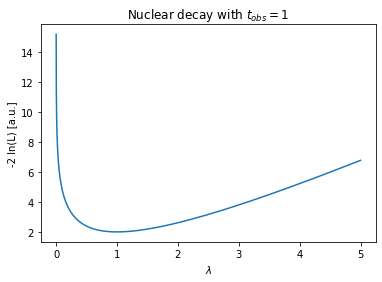

In [42]:
plt.plot(lambdas, -2*lnL(lambdas))
plt.ylabel('-2 ln(L) [a.u.]')
plt.xlabel('$\lambda$')
plt.title('Nuclear decay with $t_{obs}=1$')

Let's now try and see what happens when we have a different number of observations, i.e. if we repeat the experiment many times to obtain a certain amount $N$ of values for $t_{obs}$.

To do that, we must write the likelihood for the parameter $\lambda$ when we collect many observation.
Luckily, if the observations are independent, we can factorize the joint likelihood:

$\mathcal{L}(t_1,..., t_{N}, \lambda)= \prod_{i=1}^{N} \mathcal{L}(t_i, \lambda)$

Since we are at it, let's do this for different amounts of observations, and look at how the likelihood changes when we add more observations.

We'll first assume that we have observed a given number of times the value $t_{obs})=1$.

We want to compare the likelihood computed starting from the observations, that is a priori non-symmetric, with its parabolic approximation.

<ipython-input-6-915d24e810fb>:2: RuntimeWarning: divide by zero encountered in true_divide
  tau=1/lam
<ipython-input-41-2003f671d792>:9: RuntimeWarning: divide by zero encountered in log
  return np.log(thepdf(tobs, lam))
<ipython-input-6-915d24e810fb>:2: RuntimeWarning: divide by zero encountered in true_divide
  tau=1/lam
<ipython-input-41-2003f671d792>:9: RuntimeWarning: divide by zero encountered in log
  return np.log(thepdf(tobs, lam))
<ipython-input-6-915d24e810fb>:2: RuntimeWarning: divide by zero encountered in true_divide
  tau=1/lam
<ipython-input-41-2003f671d792>:9: RuntimeWarning: divide by zero encountered in log
  return np.log(thepdf(tobs, lam))
<ipython-input-6-915d24e810fb>:2: RuntimeWarning: divide by zero encountered in true_divide
  tau=1/lam
<ipython-input-41-2003f671d792>:9: RuntimeWarning: divide by zero encountered in log
  return np.log(thepdf(tobs, lam))


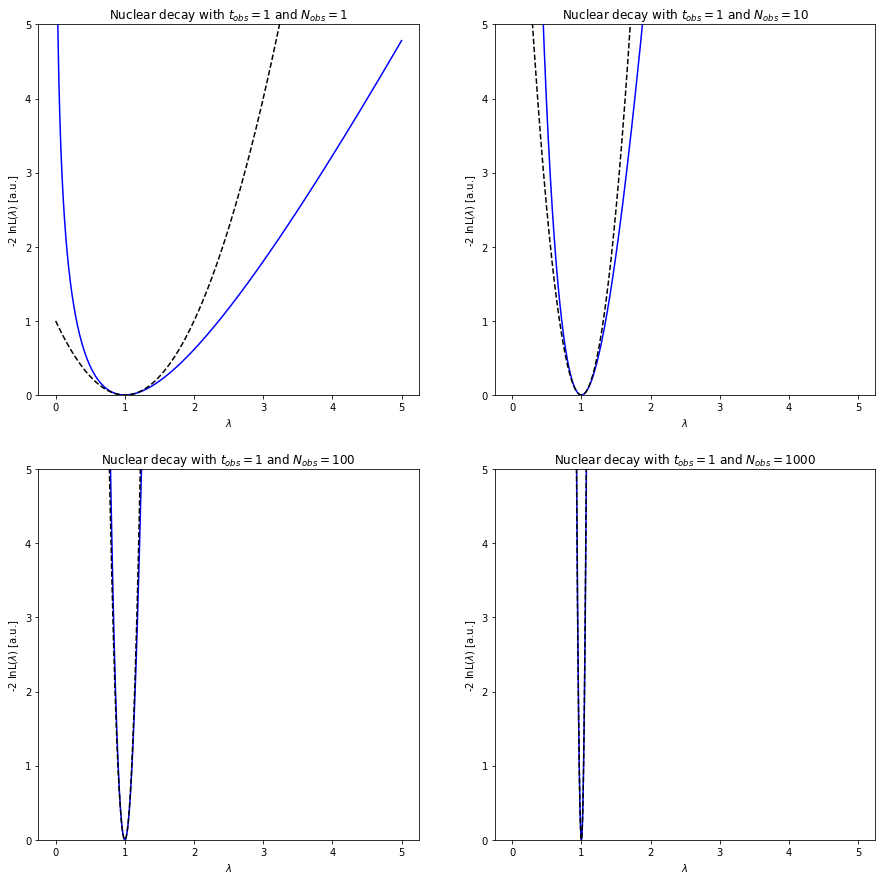

In [44]:
Nobs = [1, 10,  100, 1000]

fig, axs = plt.subplots(int(np.sqrt(len(Nobs))), int(np.sqrt(len(Nobs))), figsize=(15,15))

for N, ax in zip (Nobs, axs.ravel()):
    logL=0
    parabula=0
    
    for i in range(N):
        logL = logL + lnL(lambdas)
        parabula = parabula + (lambdas-1)**2
    
    # Shift the functions so that they both have the global minimum at zero
    parabula = parabula - min(parabula) # this should come out of the box from the definition
    m2lnL = -2*logL - min(-2*logL)
    
    ax.plot(lambdas, m2lnL, ls='-', c='blue', label='Exact MLE')
    ax.plot(lambdas, parabula, ls='--', c='black', label='Gaussian approximation')
    ax.set_ylabel('-2 lnL($\lambda$) [a.u.]')
    ax.set_xlabel('$\lambda$')
    ax.set_ylim(0,5)
    ax.set_title('Nuclear decay with $t_{obs}=1$ and $N_{obs}=%s$'%N)
    
    


The case of N observations each different from each other can be easily derived from this one by taking the formula for the factorized log likelihood and using in each factor the proper $t_{obs}$ instead of always $t_{obs}=1$ as we did above.

Try now to compute the log likelihood when the observations are:

In [ ]:
from random import sample

the_pdf = thepdf(np.linspace(())
Nobs = [ [1], [ random.sample( thepdf(  ))]  ]